**TOPIC**: HEALTH INSURANCE ANALYSIS

**BACKGROUND STUDY**: Insurance is a contract between two people which are the client and the company. The contract is a legal agreement that has been decided between both parties. Insurance is done to cover losses experienced by a client which is usually the responsibility of the Insurer i.e the Insurance company. There are certains conditions that must be met before you can have an Insurance contract. 
- Premium: Premium is the amount that a client pays to the Insurance company to get their services
- Policy Limit: Policy limit is the maximum amount of money that an Insurance company pays to cover for the losses experienced by a client.
- Deductible: Deductible is the specific amount that a client pays to the Insurance company to also cover the losses experienced by him/her.

**AIM AND OBJECTIVES**:

AIM:
- The aim of this study is to understand exploratory dataset and be able to analyze the data. 

OBJECTIVES:
- DATA CLEANING
- DATA ANALYSIS
- DATA VISUALIZATION
- DRAWING HYPOTHESIS FROM THE DATASET AND GENERATING CONCLUSION ON THE DATASET

**METHODOLOGY**: The methodology I'll be using is described as follow: I'll be using Exploratory Data Analysis.

What is Exploratory Data Analysis?

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.
I'll be using python programming language to execute all analysis on the data set with the help of some libraries such as Numpy, Pandas, Matplotlib and Seaborn.

**NUMPY**: NumPy can be used to perform a wide variety of mathematical operations on arrays. It adds powerful data structures to Python that guarantee efficient calculations with arrays and matrices and it supplies an enormous library of high-level mathematical functions that operate on these arrays and matrices.

**PANDAS**: Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data. 

**MATPLOTLIB**: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

**SEABORN**: Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn helps you explore and understand your data.

I'll proceed the data analysis 

Import all the necessary libraries:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset into my notebook called Jupyter

In [5]:
filename = r"C:\Users\Payroll 1\Downloads\archive (6)\insurance.csv"
df = pd.read_csv(filename)

Checking for empty values in the data set:

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Checking for duplicate values

In [7]:
df.duplicated().sum()

1

Dropping all duplicate values

In [8]:
df = df.drop_duplicates()

#### Checking for the average charges for each gender so as to determine who pays the highest and the lowest

In [9]:
df.groupby(by = "sex")[["sex", "charges"]].mean()

,charges
sex,
female,12569.578844
male,13974.998864


From the above analysis, the male gender pays the highest amount of charges while the female gender pays the least 

#### Checking if age affects the amount you pay

Let's check the number of unique elements in the age column. 

In [10]:
df.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [11]:
def age_group(x):
    if x <= 64 and x >= 55:
        return "old"
    elif x <= 54 and x >= 34:
        return "Adult"
    elif x<= 33 and x >= 18:
        return "Youth"
    else:
        return None

df["age_category"] = df["age"].map(age_group)

In [12]:
df["age_category"].unique()

array(['Youth', 'Adult', 'old'], dtype=object)

In [13]:
df.groupby(by = "age_category")["charges"].mean()

age_category
Adult    14427.422151
Youth     9592.068369
old      18513.276227
Name: charges, dtype: float64

From the analysis, age affects the amount you pay in such a way that the older you get, the more charges you pay

#### Checking for which gender smokes the most

In [14]:
df[df["smoker"] == "yes"].groupby(by = "sex")["smoker"].count()

sex
female    115
male      159
Name: smoker, dtype: int64

From the above analysis, the male gender smokes more than the female gender

#### Checking if the number of children affect the charges, if so, is it positive or negative

This is checking the correlation between children and charges 

In [15]:
df.groupby(by = "children")["charges"].mean().sort_values()

children
5     8786.035247
0    12384.695344
1    12731.171832
4    13850.656311
2    15073.563734
3    15355.318367
Name: charges, dtype: float64

From the above analysis, there's no relationship between the number of children and the charges you pay 

#### Checking how bmi affect  charges ( a graphical illustration could be useful as a guide)

This is also checking the corrrelation between bmi and charges

In [16]:
df.bmi.min()

15.96

In [17]:
def bmi_group(x):
    if x <= 53.13 and x >= 40:
        return "severe obesity"
    elif x <= 39.9 and x >= 30:
        return "obesity"
    elif x <= 29.9 and x >= 25:
        return "overweight"
    elif x <= 24.9 and x >= 15.96:
        return "healthy"
df["bmi_category"] = df["bmi"].map(bmi_group)

In [18]:
bmi_corr = df.groupby(by = "bmi_category")["charges"].mean()
bmi_corr

bmi_category
healthy           10253.276662
obesity           15405.830434
overweight        10993.994037
severe obesity    16784.615546
Name: charges, dtype: float64

Text(0, 0.5, 'Charges')

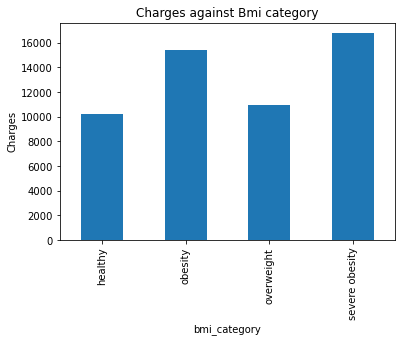

In [19]:
bmi_corr.plot(kind = "bar")
plt.title("Charges against Bmi category")
plt.ylabel("Charges")

From the above analysis and graphical illustration, there's a correlation between bmi and charges: healthy people pay the least, followed by the overweight, then people that have little amount of obesity and finally, the people with high level of obesity. Therefore, it is a positive correlation

#### Checking the region with the highest number of smokers

In [20]:
df[ df["smoker"] == "yes" ].groupby(by = "region")["smoker"].count()

region
northeast    67
northwest    58
southeast    91
southwest    58
Name: smoker, dtype: int64

From the analysis above, it can be deduced that southeast region is the region with the highest number of smokers

#### Checking if people with high bmi are mostly smokers

In [21]:
df[ df["bmi"] > 30 ].groupby(by = "smoker")["bmi"].count()

smoker
no     560
yes    144
Name: bmi, dtype: int64

From the above analysis, people with high bmi are not smokers

#### Checking the correlation between age and smokers

In [22]:
df[ df["smoker"] == "yes" ].groupby(by = "age_category")["smoker"].count()

age_category
Adult    121
Youth    111
old       42
Name: smoker, dtype: int64

There's no correlation between age and smokers that can be pointed at.

#### Checking the age rank that pays the highest charge

In [23]:
df.groupby(by = "age_category")["charges"].mean()

age_category
Adult    14427.422151
Youth     9592.068369
old      18513.276227
Name: charges, dtype: float64

From the analyis, the old rank pays the highest amount of charges

#### Classify charges into three categories and determine which region has the highest charges, medium and the least

Dividing into three categories:

In [30]:
charge = np.linspace(df["charges"].min(), df["charges"].max(), 4)
charge_category = ["low", "medium", "high"]
charge_bin = pd.cut(df["charges"], charge, labels = charge_category, include_lowest= True)
df["charge_category"] = charge_bin

Finding the region with the highest charges, medium and the least

In [32]:
df.groupby(by = "region")["charges"].mean().sort_values()

region
southwest    12346.937377
northwest    12450.840844
northeast    13406.384516
southeast    14735.411438
Name: charges, dtype: float64

From the analysis, the region with the highest is southeast, while the two regions in the middle are northwest and northeast and lastly, the least goes to southwest